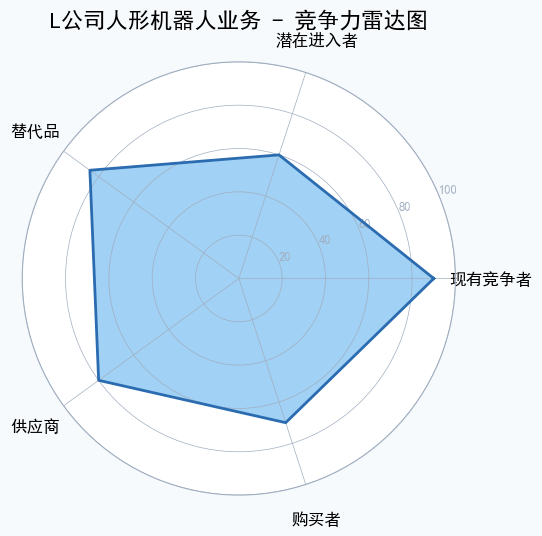

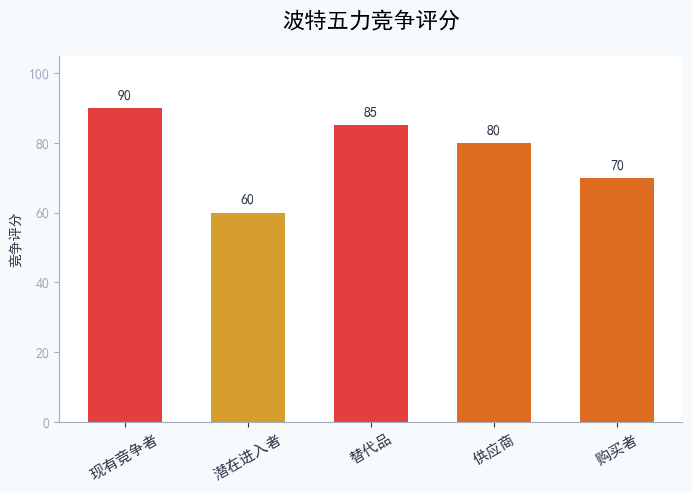

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# --- 颜色调色板 (与表格美化保持一致) ---
COLORS = {
    "header_bg": "#1a202c",
    "header_text": "#ffffff",
    "row_even": "#f7fafc",
    "row_odd": "#ffffff",
    "text_main": "#2d3748",
    "text_bold": "#000000",
    "score_high": "#e53e3e",
    "score_medium": "#dd6b20",
    "score_low": "#d69e2e",
    "radar_fill": "#63b3ed",      # 雷达图填充色 (浅蓝色)
    "radar_border": "#2b6cb0",    # 雷达图边框色 (深蓝色)
    "axis_line": "#a0aec0"        # 坐标轴线颜色 (浅灰色)
}

# --- 核心数据 (保持不变) ---
chart_data = {
    'labels': ['现有竞争者', '潜在进入者', '替代品', '供应商', '购买者'],
    'scores': [90, 60, 85, 80, 70]
}

# --- 全局字体设置 (请确保字体名称正确) ---
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# --- 1. 美化后的雷达图 ---
def create_rich_radar_chart():
    num_vars = len(chart_data['labels'])
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    scores = chart_data['scores'] + chart_data['scores'][:1]
    labels = chart_data['labels']

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    fig.patch.set_facecolor(COLORS['row_even']) # 图表背景色
    ax.set_facecolor(COLORS['row_odd'])      # 极坐标轴背景色

    # 绘制数据区域，使用调色板颜色
    ax.plot(angles, scores, color=COLORS['radar_border'], linewidth=2, label='竞争评分')
    ax.fill(angles, scores, color=COLORS['radar_fill'], alpha=0.6)

    # 设置 Y 轴标签颜色
    ax.set_yticks([20, 40, 60, 80, 100])
    ax.set_yticklabels([20, 40, 60, 80, 100], color=COLORS['axis_line'], size=9)
    ax.set_ylim(0, 100)

    # 设置 X 轴标签颜色和粗细
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, size=12, weight='bold', color=COLORS['text_bold'])
    ax.tick_params(axis='x', pad=15)

    # 设置坐标轴线颜色
    ax.spines['polar'].set_color(COLORS['axis_line'])
    ax.grid(color=COLORS['axis_line'], linestyle='-', linewidth=0.5)

    ax.set_title('L公司人形机器人业务 - 竞争力雷达图', size=16, color=COLORS['text_bold'], pad=25)
    return fig

# --- 2. 美化后的柱状图 ---
def create_rich_bar_chart():
    fig, ax = plt.subplots(figsize=(7, 5))
    fig.patch.set_facecolor(COLORS['row_even']) # 图表背景色
    ax.set_facecolor(COLORS['row_odd'])      # 柱状图区域背景色

    labels = chart_data['labels']
    scores = chart_data['scores']
    bar_colors = []
    for score in scores:
        if score >= 85:
            bar_colors.append(COLORS['score_high'])
        elif score >= 70:
            bar_colors.append(COLORS['score_medium'])
        else:
            bar_colors.append(COLORS['score_low'])

    # 使用颜色列表设置柱子的颜色
    bars = ax.bar(labels, scores, color=bar_colors, width=0.6)

    # 在柱子上添加数值标签，颜色与文字主体一致
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2),
                 ha='center', va='bottom', color=COLORS['text_main'], weight='bold')

    # 设置坐标轴线颜色
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(COLORS['axis_line'])
    ax.spines['bottom'].set_color(COLORS['axis_line'])

    # 设置刻度颜色
    ax.tick_params(axis='x', labelrotation=30, colors=COLORS['text_main'], labelsize=11)
    ax.tick_params(axis='y', colors=COLORS['axis_line'])

    ax.set_ylim(0, 105)
    ax.set_ylabel('竞争评分', color=COLORS['text_main'], weight='bold')
    ax.set_title('波特五力竞争评分', size=16, color=COLORS['text_bold'], pad=20)

    return fig

# --- 主程序入口 ---
if __name__ == '__main__':
    radar_fig = create_rich_radar_chart()
    bar_fig = create_rich_bar_chart()

    radar_fig.tight_layout(pad=3.0)
    bar_fig.tight_layout(pad=1.0)

    plt.show()

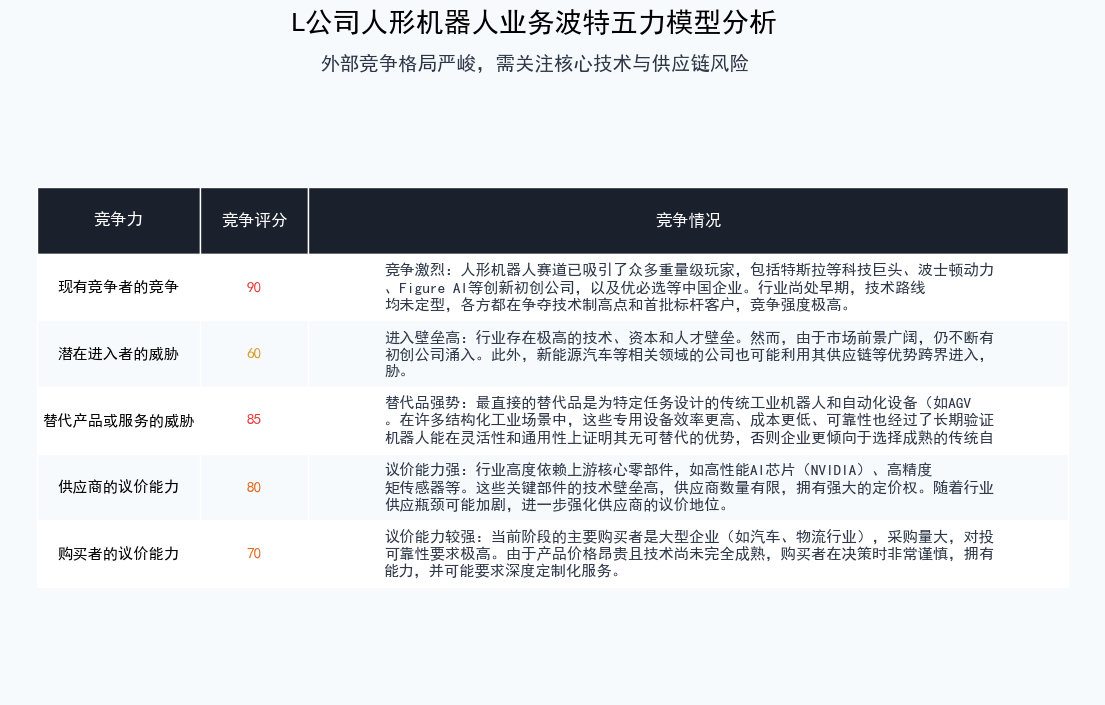

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. 定义一个更丰富的调色板，方便后续修改
COLORS = {
    "header_bg": "#1a202c",      # 表头背景色 (深灰蓝)
    "header_text": "#ffffff",    # 表头文字颜色 (白色)
    "row_even": "#f7fafc",       # 偶数行背景色 (极淡的灰色)
    "row_odd": "#ffffff",        # 奇数行背景色 (白色)
    "text_main": "#2d3748",      # 主要文字颜色 (深灰色)
    "text_bold": "#000000",      # 强调文字颜色 (黑色)
    "score_high": "#e53e3e",     # 高分颜色 (红色)
    "score_medium": "#dd6b20",   # 中分颜色 (橙色)
    "score_low": "#d69e2e"       # 低分颜色 (琥珀色)
}

# 2. 表格数据 (保持不变)
data = {
    '竞争力': ['现有竞争者的竞争', '潜在进入者的威胁', '替代产品或服务的威胁', '供应商的议价能力', '购买者的议价能力'],
    '竞争评分': [90, 60, 85, 80, 70],
    '竞争情况': [
        '竞争激烈：人形机器人赛道已吸引了众多重量级玩家，包括特斯拉等科技巨头、波士顿动力等传统先驱、Figure AI等创新初创公司，以及优必选等中国企业。行业尚处早期，技术路线和商业模式均未定型，各方都在争夺技术制高点和首批标杆客户，竞争强度极高。',
        '进入壁垒高：行业存在极高的技术、资本和人才壁垒。然而，由于市场前景广阔，仍不断有资金雄厚的初创公司涌入。此外，新能源汽车等相关领域的公司也可能利用其供应链等优势跨界进入，构成潜在威胁。',
        '替代品强势：最直接的替代品是为特定任务设计的传统工业机器人和自动化设备（如AGV、协作臂）。在许多结构化工业场景中，这些专用设备效率更高、成本更低、可靠性也经过了长期验证。除非人形机器人能在灵活性和通用性上证明其无可替代的优势，否则企业更倾向于选择成熟的传统自动化方案。',
        '议价能力强：行业高度依赖上游核心零部件，如高性能AI芯片（NVIDIA）、高精度减速器、力矩传感器等。这些关键部件的技术壁垒高，供应商数量有限，拥有强大的定价权。随着行业规模扩大，供应瓶颈可能加剧，进一步强化供应商的议价地位。',
        '议价能力较强：当前阶段的主要购买者是大型企业（如汽车、物流行业），采购量大，对投资回报率、可靠性要求极高。由于产品价格昂贵且技术尚未完全成熟，购买者在决策时非常谨慎，拥有较强的议价能力，并可能要求深度定制化服务。'
    ]
}

# 3. 准备数据和文本换行 (保持不变)
def wrap_text(text, width):
    return '\n'.join([text[i:i+width-5] for i in range(0, len(text), width)])

wrapped_descriptions = [wrap_text(desc, 45) for desc in data['竞争情况']]
cell_data = list(zip(data['竞争力'], data['竞争评分'], wrapped_descriptions))
column_labels = ['竞争力', '竞争评分', '竞争情况']

# 4. 绘图和样式设置
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(figsize=(14, 8))
ax.axis('off')

# 设置整个图的背景色
fig.set_facecolor(COLORS['row_even'])

table = ax.table(
    cellText=cell_data,
    colLabels=column_labels,
    colWidths=[0.15, 0.1, 0.7],
    cellLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(11)
table.scale(1, 4.0) # 只拉伸高度，保持宽度不变

# 5. 【核心美化】遍历单元格进行精细化样式设置
for (i, j), cell in table.get_celld().items():
    cell.set_edgecolor(COLORS['row_odd']) # 用白色作为单元格的边框，制造分隔感
    
    # --- 设置表头 ---
    if i == 0:
        cell.set_facecolor(COLORS['header_bg'])
        cell.get_text().set_color(COLORS['header_text'])
        cell.get_text().set_weight('bold')
        cell.get_text().set_fontsize(12)
        continue

    # --- 设置数据行 ---
    # 实现隔行变色
    if i % 2 == 0:
        cell.set_facecolor(COLORS['row_even'])
    else:
        cell.set_facecolor(COLORS['row_odd'])
        
    # 设置所有数据行的主要文字颜色
    cell.get_text().set_color(COLORS['text_main'])

    # --- 针对特定列进行美化 ---
    if j == 0:  # 第一列“竞争力”
        cell.get_text().set_weight('bold')
        cell.get_text().set_color(COLORS['text_bold'])

    elif j == 1:  # 第二列“竞争评分”
        score = cell.get_text().get_text()
        score = int(score)
        # 根据分数设置不同颜色（语义化）
        if score >= 85:
            cell.get_text().set_color(COLORS['score_high'])
        elif score >= 70:
            cell.get_text().set_color(COLORS['score_medium'])
        else:
            cell.get_text().set_color(COLORS['score_low'])
        cell.get_text().set_weight('bold')

    elif j == 2:  # 第三列“竞争情况”
        cell.get_text().set_ha('left') # 左对齐
        cell.set_text_props(va='center') # 垂直居中

# 6. 添加更丰富的标题
plt.figtext(0.5, 0.95, 'L公司人形机器人业务波特五力模型分析', 
            ha='center', va='center', fontsize=20, weight='bold', color=COLORS['text_bold'])
plt.figtext(0.5, 0.90, '外部竞争格局严峻，需关注核心技术与供应链风险', 
            ha='center', va='center', fontsize=14, color=COLORS['text_main'])

plt.show()